### Table of Contents:
* [1. Feature selection and improve accuracy of data mining results ](#1)
* &emsp;[1.1. Importing Libraries](#11)
* &emsp;[1.2. Converting categorical data to numerical](#12)
* &emsp;[1.3. Correlation Matrix](#13)
* &emsp;[1.4. Heat-Map of correlation Matrix](#14)
* &emsp;[1.5. Relevant attributes to improve the accuracy of data mining results](#15)

# 1. Feature selection and improve accuracy of data mining results <a class="anchor" id="1"></a>

Select relevant attributes from your dataset to improve the accuracy of data mining results. 

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Converting categorical data to numerical <a class="anchor" id="12"></a>

In [2]:
df = pd.read_csv('data/training_data.csv')

In [3]:
categorical_features = ['company','country','director','genre','rating','released','star','year',
                        'writer','original_title','overview','tagline','title','genres_edited',
                        'spoken_languages_edited','production_countries_edited','keywords_edited']
continuous_features = ['budget','runtime','score','votes','popularity']
normalized_features = [e+'_norm' for e in continuous_features]
target_features = ['isprofit','profitability_ratio']
all_features = categorical_features + continuous_features + normalized_features + target_features

In [4]:
df['company']=df['company'].astype('category').cat.codes
df['country']=df['country'].astype('category').cat.codes
df['director']=df['director'].astype('category').cat.codes
df['genre']=df['genre'].astype('category').cat.codes
df['rating']=df['rating'].astype('category').cat.codes
df['star']=df['star'].astype('category').cat.codes
df['writer']=df['writer'].astype('category').cat.codes

## 1.3. Correlation Matrix <a class="anchor" id="13"></a>

In [5]:
corr_df=df[all_features].corr()

In [6]:
corr_df

,company,country,director,genre,rating,star,year,writer,budget,runtime,score,votes,popularity,budget_norm,runtime_norm,score_norm,votes_norm,popularity_norm,isprofit,profitability_ratio
company,1.000000,-0.017782,0.002874,-0.073149,-0.101551,0.023274,-0.024054,0.012118,0.097531,0.005454,-0.015315,0.019071,0.049744,0.097531,0.005454,-0.015315,0.019071,0.049744,0.022694,0.018585
country,-0.017782,1.000000,0.018204,-0.002472,0.026836,-0.045394,-0.077195,-0.018488,0.059626,-0.056416,-0.085744,0.008901,0.007047,0.059626,-0.056416,-0.085744,0.008901,0.007047,0.129073,0.156783
director,0.002874,0.018204,1.000000,0.070478,0.014242,0.057815,-0.004846,0.126109,-0.001278,0.065080,0.075730,0.063488,0.038147,-0.001278,0.065080,0.075730,0.063488,0.038147,-0.018902,0.013691
genre,-0.073149,-0.002472,0.070478,1.000000,0.145487,0.012269,0.019018,0.007385,-0.285296,0.030601,0.095737,-0.104413,-0.142618,-0.285296,0.030601,0.095737,-0.104413,-0.142618,0.029489,0.047263
rating,-0.101551,0.026836,0.014242,0.145487,1.000000,0.012840,-0.041962,-0.004130,-0.197965,0.188227,0.127476,0.073216,-0.045281,-0.197965,0.188227,0.127476,0.073216,-0.045281,-0.080832,-0.091355
star,0.023274,-0.045394,0.057815,0.012269,0.012840,1.000000,-0.011091,-0.000693,0.026384,0.054634,0.043207,0.019481,0.000969,0.026384,0.054634,0.043207,0.019481,0.000969,-0.016117,-0.014121
year,-0.024054,-0.077195,-0.004846,0.019018,-0.041962,-0.011091,1.000000,-0.012606,0.233329,-0.021891,0.017631,0.299654,0.200500,0.233329,-0.021891,0.017631,0.299654,0.200500,-0.065895,-0.133509
writer,0.012118,-0.018488,0.126109,0.007385,-0.004130,-0.000693,-0.012606,1.000000,-0.040317,-0.002660,0.034381,0.008656,-0.011702,-0.040317,-0.002660,0.034381,0.008656,-0.011702,0.002278,0.038103
budget,0.097531,0.059626,-0.001278,-0.285296,-0.197965,0.026384,0.233329,-0.040317,1.000000,0.245678,-0.095490,0.377543,0.336131,1.000000,0.245678,-0.095490,0.377543,0.336131,-0.067468,-0.139417
runtime,0.005454,-0.056416,0.065080,0.030601,0.188227,0.054634,-0.021891,-0.002660,0.245678,1.000000,0.392081,0.201551,0.110656,0.245678,1.000000,0.392081,0.201551,0.110656,-0.032826,-0.042485


## 1.4. Heat-Map of correlation Matrix <a class="anchor" id="14"></a>

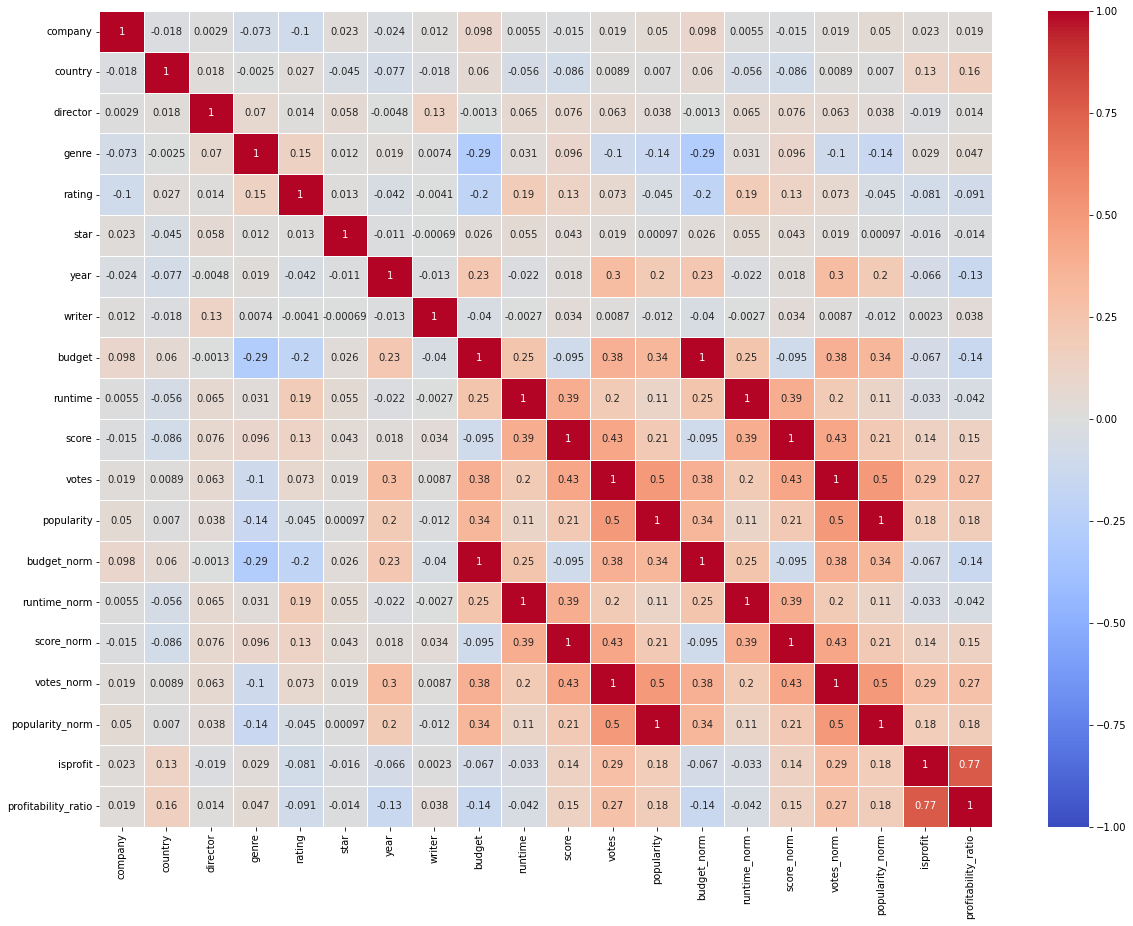

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df,cmap='coolwarm',vmin=-1, vmax=1,annot=True,linewidth=.5);


## 1.5. Relevant attributes to improve the accuracy of data mining results <a class="anchor" id="15"></a>

In [8]:
corr_df_features = set()
for i in range(len(corr_df.columns)-2):
    if corr_df.iloc[i,18]<-0.04 or corr_df.iloc[i,18]>0.04 or \
        corr_df.iloc[i,19]<-0.04 or corr_df.iloc[i,19]>0.04:
        corr_df_features.add(corr_df.columns[i])

In [9]:
corr_df_features

{'budget',
 'budget_norm',
 'country',
 'genre',
 'popularity',
 'popularity_norm',
 'rating',
 'runtime',
 'runtime_norm',
 'score',
 'score_norm',
 'votes',
 'votes_norm',
 'year'}

In [10]:
df[list(corr_df_features)+['isprofit','profitability_ratio']].to_csv('data/final_training_data.csv')